## Desciption

This model predicts the expression of a gene based on the Zhang (2023) DeepSEED data.

In [1]:
import CNN_DeepSEED_1_0 as parent

In [2]:
name = 'CNN_DeepSEED_1_0'

In [3]:
import pandas as pd

file_path = '../Data/Zhang (DeepSEED)/ecoli_mpra_3_laco.csv'
df = pd.read_csv(file_path)
df.head()

,realA,realB,expr
0,MMMMMMMMMMMMTCGGCTAGCCAGATTGTTGTGGTCTGATTAAAGT...,TCCCACTATTTGTCGGCTAGCCAGATTGTTGTGGTCTGATTAAAGT...,2.346474
1,MMMMMMMMMMMMMMMMMMGTGACAAATCGTGACACAATATCGTCAC...,CTTTTTTTTGAATAAATTGTGACAAATCGTGACACAATATCGTCAC...,3.501752
2,GGTTCTACCGAACTTGTCATGTAAATTAAAAAAATAAAMMMMMMMM...,GGTTCTACCGAACTTGTCATGTAAATTAAAAAAATAAAAACGTGTT...,5.566020
3,MMMMMMMMMMMMMACTGGCGCTTCTGCTGAAAAAAAGTCCATGGTG...,TCGCTCTCGGAACACTGGCGCTTCTGCTGAAAAAAAGTCCATGGTG...,-0.640324
4,MMMMMMMMMMMMMMMMMMMMMMMTCATAGATTAAGAATTTTCCTGA...,GCTTTAGAAACAAAAGGGACGTTTCATAGATTAAGAATTTTCCTGA...,-2.138048


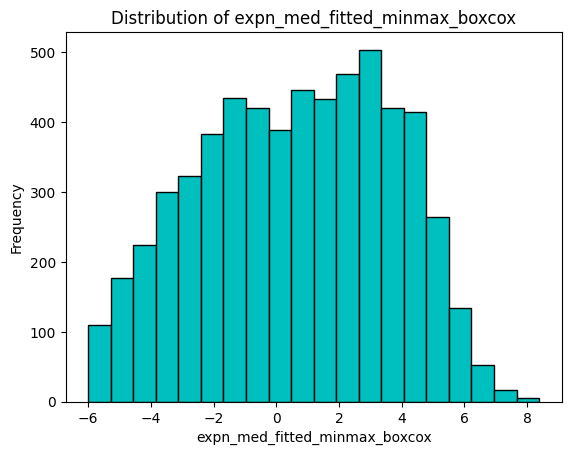

In [4]:
# graph the distribution of observed transciption rates

import matplotlib.pyplot as plt

plt.hist(df['expr'], bins=20, color='c', edgecolor='black')
plt.title('Distribution of expn_med_fitted_minmax_boxcox')
plt.xlabel('expn_med_fitted_minmax_boxcox')
plt.ylabel('Frequency')
plt.show()

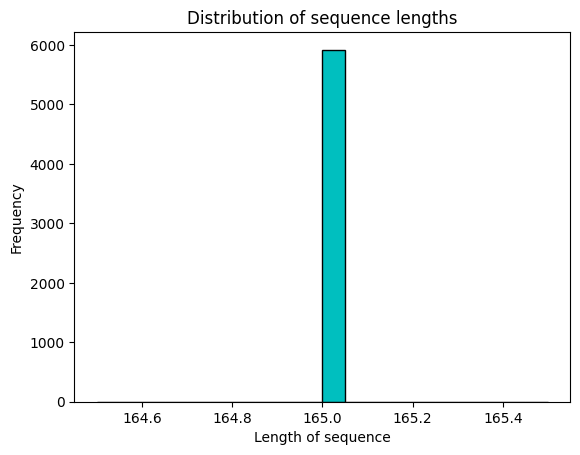

In [ ]:
# plot the dirstribution of sequence lengths

plt.hist(df['realB'].apply(len), bins=20, color='c', edgecolor='black')
plt.title('Distribution of sequence lengths')
plt.xlabel('Length of sequence')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

X = df[['realB']].astype(str).agg(''.join, axis=1)
y = MinMaxScaler().fit_transform(df['expr'].values.reshape(-1, 1))

# This version of preprocess_sequences truncates the sequences to 150 bp (DeepSEED data is 165 bp)
X = parent.preprocess_sequences(X)

In [7]:
X_train, X_val, y_train, y_val = parent.train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = parent.train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4736, 165, 4), (592, 165, 4), (592, 165, 4), (4736, 1), (592, 1), (592, 1))

In [8]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0641 - val_loss: 0.0277
Epoch 2/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0276 - val_loss: 0.0257
Epoch 3/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0237 - val_loss: 0.0257
Epoch 4/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0218 - val_loss: 0.0268
Epoch 5/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - val_loss: 0.0257
Epoch 6/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - val_loss: 0.0257
Epoch 7/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - val_loss: 0.0319
Epoch 8/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0125 - val_loss: 0.0289
Epoch 9/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0321
Epoch 10/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - val_loss: 0.0324
Epoch 11/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - val_loss: 0.0305
Epoch 12/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


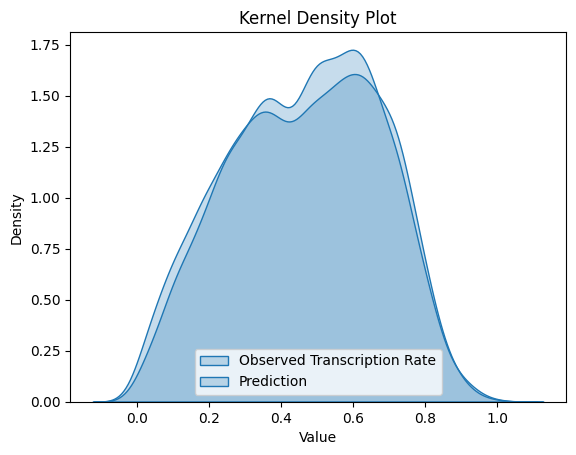

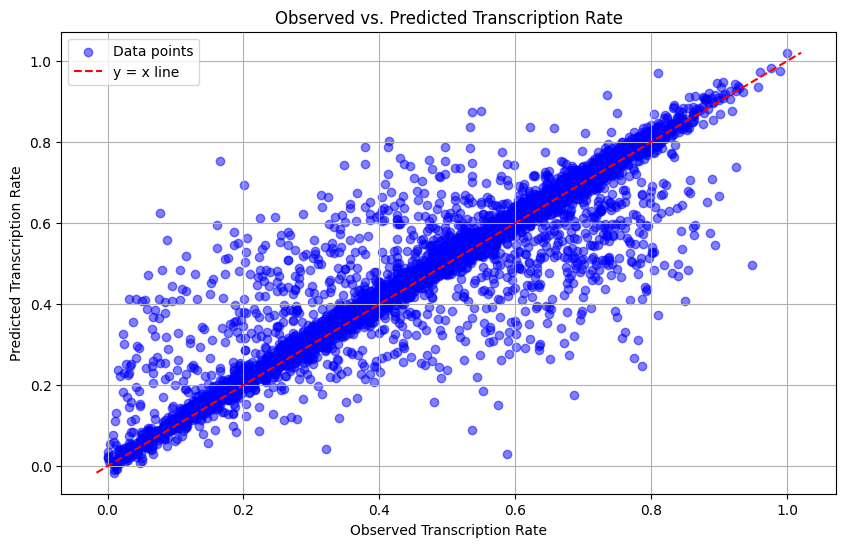

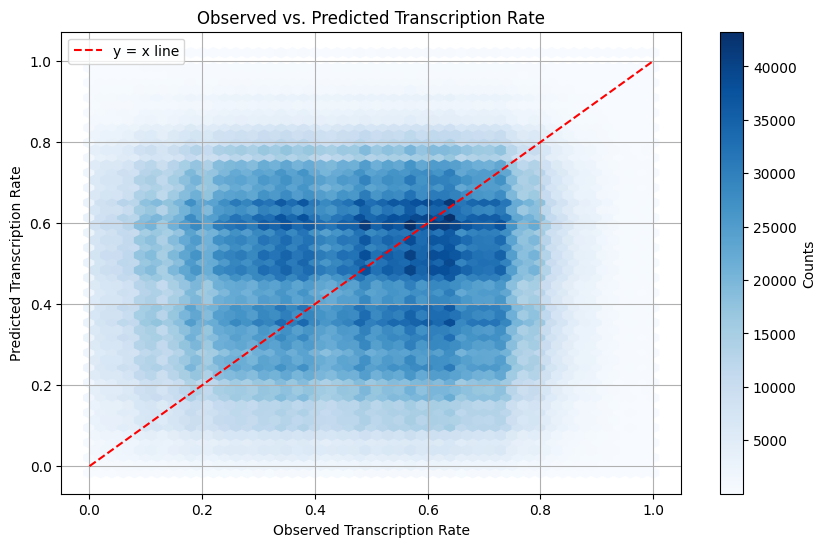

In [9]:
predicted = parent.load_and_predict(name, X)

parent.plot_kde(y, predicted)
parent.plot_scatter(y, parent.ravel(predicted))
parent.plot_hexbin(y, parent.ravel(predicted))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


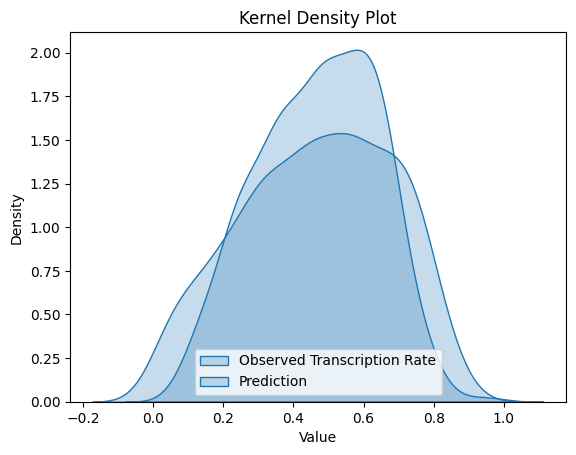

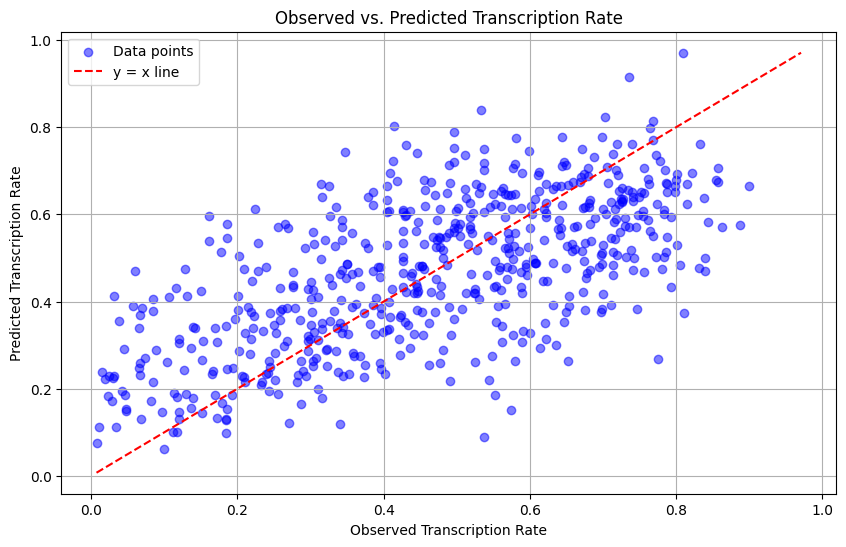

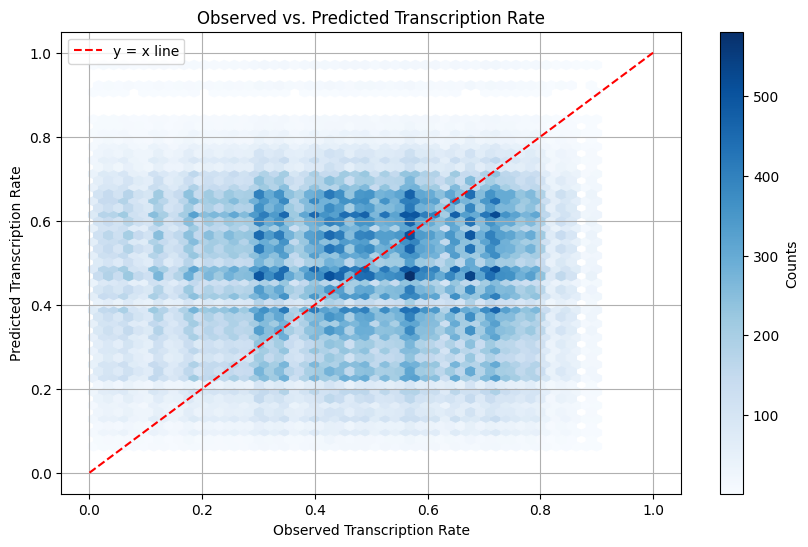

In [27]:
predicted = parent.load_and_predict(name, X_test)

parent.plot_kde(y_test, predicted)
parent.plot_scatter(parent.ravel(y_test), parent.ravel(predicted))
parent.plot_hexbin(y_test, parent.ravel(predicted))

In [13]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE:  0.027961788683387667
RMSE:  0.16721778817873315
MAE:  0.13437400709613231
R2:  0.39460147689176905
